In [ ]:
import joblib
import spacy
import pandas as pd
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

try:
    nlp = spacy.load("es_core_news_sm")
except OSError:
    print("El modelo 'es_core_news_sm' de spaCy no está descargado. Por favor, ejecuta:")
    print("python -m spacy download es_core_news_sm")
    exit()

class PreprocessText(BaseEstimator, TransformerMixin):
    def __init__(self, nlp_model):
        self.nlp = nlp_model
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        preprocessed_texts = [self._preprocess(text) for text in X]
        return preprocessed_texts

    def _preprocess(self, text):
        # minux, removing stop words, tokenize 
        nlp = spacy.load('es_core_news_sm')
        
        text = text.lower()
        doc = nlp(text)

        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

        preprocessed_text = ' '.join(tokens)
        
        doc = nlp(preprocessed_text)
        
        features = {}
        for token in doc:
            if not token.is_stop and not token.is_punct:
                key = token.lemma_.lower()
                features[key] = features.get(key, 0) + 1
        return features

df = pd.read_csv("./dataset.csv")

X = df["comentario"]
y = df["sentimiento"]

model = Pipeline([
    ('preprocess', PreprocessText(nlp_model=nlp)),
    ('dictVec', DictVectorizer()),
    ('bayesNB', MultinomialNB(class_prior=[0.5, 0.5]))
])

model.fit(X, y)

joblib.dump(model, "model.pkl")


['model.pkl']

In [109]:
positive_comments = [
    "Me encantó este producto, superó mis expectativas.",
    "El servicio al cliente fue excepcional.",
    "Muy buena calidad, definitivamente lo recomendaré.",
    "La entrega llegó antes de lo esperado.",
    "Excelente experiencia de compra.",
    "El diseño es hermoso y muy práctico.",
    "Estoy muy satisfecho con la atención recibida.",
    "La relación calidad-precio es insuperable.",
    "Funcionó perfectamente desde el primer momento.",
    "El producto es tal cual lo describe la página.",
    "Gran rapidez en el envío.",
    "La interfaz es muy intuitiva y fácil de usar.",
    "Quedé encantado con los resultados.",
    "La atención fue muy amable y profesional.",
    "El empaque estaba en perfectas condiciones.",
    "Me gustó mucho la presentación y los detalles.",
    "El rendimiento es sobresaliente.",
    "La experiencia de usuario es muy fluida.",
    "Superó mis expectativas en todos los aspectos.",
    "Es justo lo que estaba buscando.",
    "Lo volvería a comprar sin pensarlo.",
    "El soporte técnico resolvió mi duda rápidamente.",
    "La calidad de los materiales es excelente.",
    "Me siento muy bien con mi compra.",
    "Todo funcionó de manera impecable.",
    "La app es muy estable y rápida.",
    "El producto es muy durable.",
    "La atención posventa fue muy eficiente.",
    "Estoy muy contento con la compra.",
    "Totalmente recomendado."
]

negative_comments = [
    "No me gustó este producto, llegó en mal estado.",
    "La calidad es muy pobre y decepcionante.",
    "Servicio al cliente inexistente, nadie responde.",
    "Nunca volvería a comprar esto.",
    "No funciona como prometieron en la descripción.",
    "Experiencia de compra muy mala.",
    "El envío tardó muchísimo más de lo indicado.",
    "El empaque llegó abierto y dañado.",
    "El producto no cumple con lo que ofrece.",
    "Precio excesivo para lo que ofrece.",
    "La interfaz es confusa y poco intuitiva.",
    "El diseño es incómodo de usar.",
    "Las instrucciones vienen incompletas.",
    "Tuve muchos problemas para instalarlo.",
    "No vale lo que cuesta.",
    "El soporte técnico no me brindó solución.",
    "Faltan piezas en el paquete recibido.",
    "La batería se agota en minutos.",
    "El material se siente de baja calidad.",
    "La aplicación se cierra sola constantemente.",
    "Recibí un artículo totalmente distinto al pedido.",
    "La atención posventa fue muy deficiente.",
    "No detecta correctamente los datos ingresados.",
    "El audio sale distorsionado y bajo.",
    "La configuración es demasiado complicada.",
    "Tuve que devolverlo de inmediato.",
    "No lo recomendaría a nadie.",
    "Mal empaquetado y entrega retrasada.",
    "Se rompió en el primer uso.",
    "No cumple en absoluto con mis expectativas."
]

In [110]:
model.predict(X=positive_comments)

array(['positivo', 'positivo', 'positivo', 'negativo', 'positivo',
       'negativo', 'positivo', 'positivo', 'positivo', 'negativo',
       'negativo', 'positivo', 'negativo', 'negativo', 'positivo',
       'negativo', 'negativo', 'negativo', 'positivo', 'positivo',
       'positivo', 'negativo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'negativo', 'positivo', 'positivo'],
      dtype='<U8')

In [111]:
model.predict(X=negative_comments)

array(['positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'positivo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'positivo', 'negativo',
       'positivo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo'],
      dtype='<U8')

In [112]:
from sklearn.metrics import classification_report

test_data = pd.read_csv('./testdata.csv')

X_test = test_data['comentario']
y_test = test_data['sentimiento']

y_pred = model.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negativo       0.67      0.93      0.78        15
    positivo       0.89      0.53      0.67        15

    accuracy                           0.73        30
   macro avg       0.78      0.73      0.72        30
weighted avg       0.78      0.73      0.72        30



[[14  1]
 [ 7  8]]


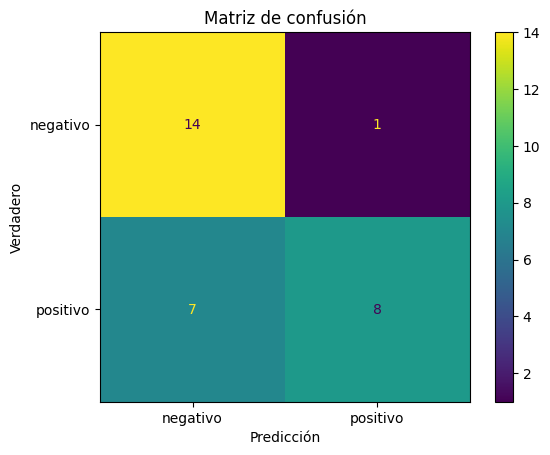

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=['negativo', 'positivo'])

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['negativo', 'positivo']
)

print(cm)

disp.plot()
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

In [1]:
model.predict(['dificil de contactar'])

NameError: name 'model' is not defined